In [2]:
import h5py
import pip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#read the hdf5 file from 'C:\\Users\\giuli\\Documents\\Open_Campus\\Sleep_Apnea\\00_pre files\\X_train.h5'
file_path = 'C:\\Users\\giuli\\Documents\\Open_Campus\\Sleep_Apnea\\00_pre files\\X_train.h5'
#with h5py.File(file_path, 'r') as hdf:
with h5py.File(file_path, 'r') as f:
    # List all groups
    """print("Keys: %s" % hdf.keys())
    a_group_key = list(hdf.keys())[0]"""

    key = list(f.keys())[0]
    data = f[key][:]   # AGORA sim vira um numpy array

    # Get the data
    data = list(hdf[a_group_key])

Keys: <KeysViewHDF5 ['data']>


In [13]:
X = np.array(data)   # transforma lista em array
print(X.shape)


(4400, 72002)


In [14]:
signals_flat = X[:, 2:]   # cria a variável de novo

print(signals_flat.shape)   # deve ser (4400, 72000)
print(8 * 9000)             # deve ser 72000


(4400, 72000)
72000


In [15]:
signals = signals_flat.reshape(4400, 8, 9000)
print(signals.shape)   # esperado: (4400, 8, 9000)


(4400, 8, 9000)


In [16]:
signal_names = [
    "abd_belt",
    "airflow",
    "ppg",
    "thoracic_belt",
    "snoring",
    "spo2",
    "c4_a1",
    "o2_a1",
]


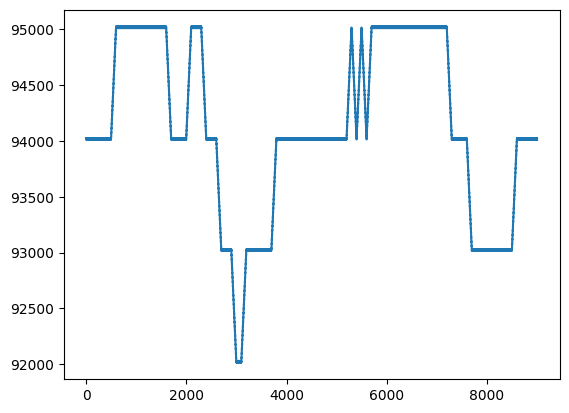

In [17]:
i = 0
spo2_i = signals[i, signal_names.index("spo2")]   # shape (9000,)
plt.plot(spo2_i)

In [21]:
# agora vamos criar Y
y_df = pd.read_csv(r"C:\Users\giuli\Documents\Open_Campus\Sleep_Apnea\00_pre files\y_train_tX9Br0C.csv").set_index("ID")

# sample_ids são a primeira coluna de X
sample_ids = X[:, 0].astype(int)

Y = np.vstack([y_df.loc[sid].values for sid in sample_ids])
print(Y.shape)   # esperado: (4400, 90)


(4400, 90)
